<a href="https://colab.research.google.com/github/MariaDaniela15/googlecolab/blob/main/taller1corte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TALLER

#1. Introducción
##Propósito del Manual
Este manual tiene como objetivo proporcionar una guía clara y práctica sobre la gestión de fechas y tiempos en ciencia de datos, utilizando ejemplos en Python. Se abordan conceptos clave, funciones comunes y buenas prácticas para trabajar con información temporal de manera eficiente y precisa.

#Importancia de la Gestión de Fechas y Tiempos en Ciencia de Datos
El manejo adecuado de fechas y tiempos es fundamental en proyectos de ciencia de datos, ya que muchas fuentes de información incluyen componentes temporales. Ya sea para analizar series de tiempo, agrupar datos por períodos, calcular duraciones o detectar tendencias, comprender cómo manipular y transformar datos temporales permite obtener insights más precisos y relevantes. Una gestión inadecuada puede conducir a errores en el análisis, interpretaciones incorrectas y decisiones erróneas.
#2.Funciones de tiempo
#¿Qué son las funciones de tiempo?
Las funciones de tiempo son herramientas integradas en los lenguajes de programación, como Python, que permiten trabajar con datos relacionados con fechas y horas. Estas funciones facilitan tareas como la conversión de cadenas de texto a objetos de fecha, la extracción de componentes temporales (año, mes, día, hora), el cálculo de diferencias entre fechas, la creación de rangos temporales, entre otras operaciones.

#Utilidad en la manipulación de datos temporales
En ciencia de datos, las funciones de tiempo son esenciales para:

* Limpiar y transformar datos temporales, por ejemplo, convertir fechas en distintos formatos a un formato estándar.

* Extraer información específica como el día de la semana, el trimestre o la semana del año, lo cual es útil para análisis estacional o segmentación.

* Realizar cálculos temporales, como medir el tiempo transcurrido entre dos eventos o calcular edades.

* Agrupar o resumir datos por intervalos de tiempo (diario, semanal, mensual), una práctica común en análisis de series temporales.

* Filtrar datos según rangos de fechas, lo cual permite trabajar con períodos específicos de interés.

Estas funciones permiten automatizar y simplificar el tratamiento de datos cronológicos, facilitando análisis más robustos y eficientes.
#Aplicabilidad: Contextos Comunes
La gestión de fechas y tiempos es esencial en muchos campos de la ciencia de datos. Algunos ejemplos incluyen:

* Series temporales: análisis de tendencias y estacionalidad en datos cronológicos.

* Análisis financiero: cálculo de retornos, vencimientos y evolución de precios.

* Sensores e IoT: monitoreo continuo y detección de eventos en tiempo real.

* Logística: planificación de rutas y tiempos de entrega.

* Salud: seguimiento de pacientes y evolución de enfermedades.

* Marketing: análisis de comportamiento según el tiempo (temporadas, campañas).

Estas aplicaciones demuestran cómo el componente temporal es clave para entender, analizar y predecir fenómenos en distintos contextos.



In [ ]:
import pandas as pd
# Crear un rango de fechas
fechas = pd.date_range(start='2022-01-01', periods=12, freq='D')
print(fechas)
# Extraer elementos
df = pd.DataFrame({'fechas': fechas})
df['año'] = df['fechas'].dt.year
df['mes'] = df['fechas'].dt.month
df['día'] = df['fechas'].dt.day
df['día_semana'] = df['fechas'].dt.day_name()

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')


#Calculo de días transcurridos

In [6]:
import pandas as pd
from datetime import datetime

# Creamos un DataFrame con fechas semanales desde enero 2024
data = {
    'fecha': pd.date_range(start='2024-01-25', periods=10, freq='7D'),
    'evento': [f'Evento {i}' for i in range(1, 11)]
}

df = pd.DataFrame(data)
print(df)


       fecha     evento
0 2024-01-25   Evento 1
1 2024-02-01   Evento 2
2 2024-02-08   Evento 3
3 2024-02-15   Evento 4
4 2024-02-22   Evento 5
5 2024-02-29   Evento 6
6 2024-03-07   Evento 7
7 2024-03-14   Evento 8
8 2024-03-21   Evento 9
9 2024-03-28  Evento 10


In [7]:
# Fecha de referencia
fecha_referencia = datetime(2025, 4, 1)

# Calcular los días pasados desde esa fecha
df['dias_pasados'] = (fecha_referencia - df['fecha']).dt.days

print(df[['fecha', 'evento', 'dias_pasados']])


       fecha     evento  dias_pasados
0 2024-01-25   Evento 1           432
1 2024-02-01   Evento 2           425
2 2024-02-08   Evento 3           418
3 2024-02-15   Evento 4           411
4 2024-02-22   Evento 5           404
5 2024-02-29   Evento 6           397
6 2024-03-07   Evento 7           390
7 2024-03-14   Evento 8           383
8 2024-03-21   Evento 9           376
9 2024-03-28  Evento 10           369


In [10]:
# Definir el rango
inicio = datetime(2024, 3, 1)
fin = datetime(2025, 1, 1)

# Filtrar por fechas
filtro = df[(df['fecha'] >= inicio) & (df['fecha'] <= fin)]

print(filtro)


       fecha     evento  dias_pasados
6 2024-03-07   Evento 7           390
7 2024-03-14   Evento 8           383
8 2024-03-21   Evento 9           376
9 2024-03-28  Evento 10           369


3. JERARQUÍA DE FECHAS

Organizar y agrupar datos por componentes temporales como año, trimestre, mes, semana, día, etc., permite hacer análisis más claros y comparables. Esto es especialmente útil cuando se trabaja con series de tiempo o datos cronológicos.

#Aplicabilidad
Ideal para:

* Dashboards e informes ejecutivos

* Análisis de tendencias y estacionalidades

* Pronósticos y modelos de series temporales

* Comparaciones intermensuales o interanuales

CASOS PRACTICOS

Supongamos un DataFrame con ventas diarias:

In [12]:
import pandas as pd
import numpy as np

# Crear datos de ejemplo
df = pd.DataFrame({
    'fecha': pd.date_range(start='2024-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})


Agrupación por mes:

In [13]:
# Extraer el periodo mensual
df['mes'] = df['fecha'].dt.to_period('M')

# Agrupar por mes y sumar ventas
ventas_mensuales = df.groupby('mes')['ventas'].sum()
ventas_mensuales


,ventas
mes,
2024-01,17117
2024-02,14021
2024-03,15866


ACTIVIDAD

Crear un dataframe de ejemplo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset con ventas diarias
df = pd.DataFrame({
    'fecha': pd.date_range(start='2022-01-01', periods=180, freq='D'),
    'ventas': np.random.randint(100, 1000, size=180)
})


Agrupar por trimestre y calcular estadísticas descriptivas

In [15]:
# Extraer el trimestre
df['trimestre'] = df['fecha'].dt.to_period('Q')

# Agrupar y describir
estadisticas_trimestrales = df.groupby('trimestre')['ventas'].describe()
print(estadisticas_trimestrales)


           count        mean         std    min    25%    50%     75%    max
trimestre                                                                   
2022Q1      90.0  575.855556  271.774839  106.0  348.5  566.5  821.50  998.0
2022Q2      90.0  527.966667  250.227512  102.0  361.5  510.0  744.75  980.0


Visualizar ventas promedio por mes

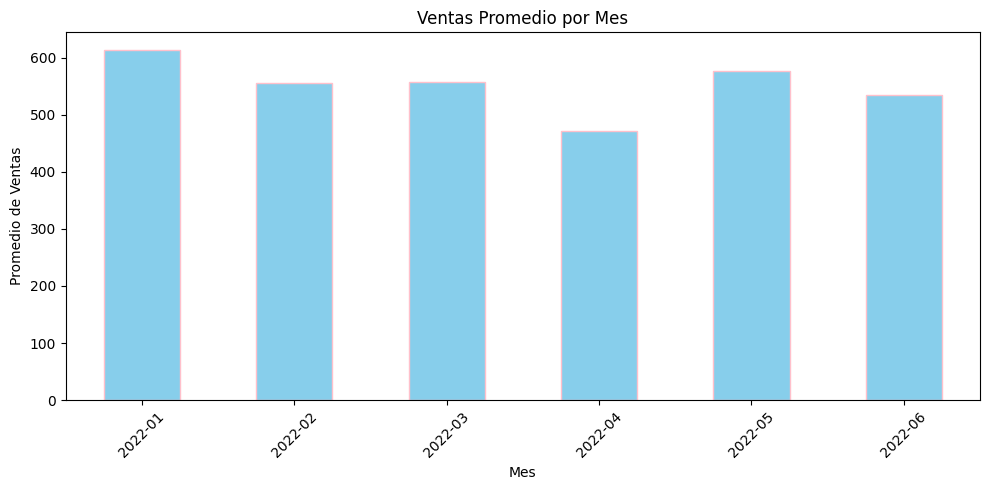

In [17]:
# Extraer el mes
df['mes'] = df['fecha'].dt.to_period('M')

# Agrupar por mes y calcular el promedio
promedio_mensual = df.groupby('mes')['ventas'].mean()

# Visualización
promedio_mensual.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='pink')
plt.title('Ventas Promedio por Mes')
plt.ylabel('Promedio de Ventas')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CONCLUSIONES

# ¿Qué aprendí?
Aprendí a agrupar datos por trimestre y mes usando pandas, y a calcular estadísticas como promedios. También practiqué cómo hacer gráficos para ver las ventas a lo largo del tiempo.

# ¿Para qué sirve?
Esto se puede usar para reportes de ventas, análisis trimestrales, o detectar patrones en distintos meses. Es útil en negocios, salud, educación, etc.

# ¿Qué dificultades tuve?
Al principio no sabía cómo agrupar bien por fechas, pero encontré que usar .dt.to_period('Q') o 'M' lo soluciona. También tuve que ajustar el gráfico para que se vea claro, rotando las etiquetas del eje X.

